## Activity 1: Analyze Titanic Dataset
This dataset contains detailed information on the passengers aboard the Titanic. Our goal is to create a model able to predict whether a passenger will survive. However, before we start training our machine learning model, let us first explore the dataset.

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline


maindf = pd.read_csv('titanic_data/train.csv')
testdf = pd.read_csv('titanic_data/test.csv')

In [4]:
maindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
maindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
maindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Dictionary
![alt text](data_dict.png "Title")

## What features have correlation with passenger survival rates?

In [7]:
maindf.groupby('Survived').count().Name

Survived
0    549
1    342
Name: Name, dtype: int64

In [8]:
maindf.groupby(['Survived','Sex']).count().Name

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Name, dtype: int64

<AxesSubplot:xlabel='Survived,Sex'>

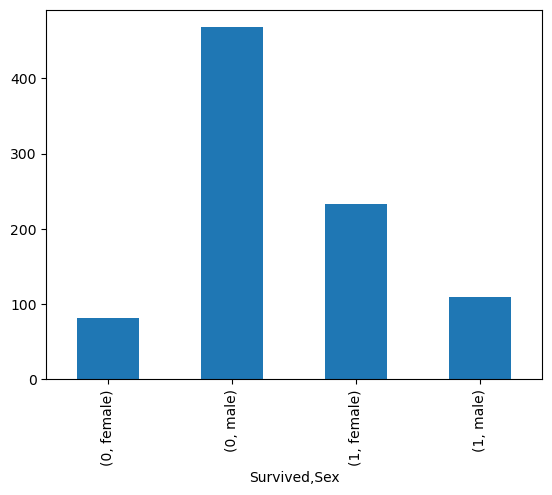

In [9]:
maindf.groupby(['Survived','Sex']).count().Name.plot(kind='bar')

From this we observe that **342 survived** and **549 did not survive**. \
Among the survivors, 233 are female and 109 are male. \
Among those who did not survive, 81 are female and 468 are male.

## Activity 2: Train Your Model
Using what we have learned earlier about Decision Trees and Random Forest Classifiers, work with your partner to train your own model to predict whether a passenger with given features will survive. 

In [10]:
print("Missing training data:")
display(maindf.isnull().sum())

Missing training data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
maindf['Age'] = maindf.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [12]:
maindf = maindf.drop(['Cabin', 'Embarked'], axis=1)

In [13]:
X = maindf.drop(['Survived'], axis=1)
y = maindf['Survived']

In [14]:
X = pd.get_dummies(X)

In [15]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#splitting the train and test sets
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.3)

### Using a Decision Tree

In [16]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

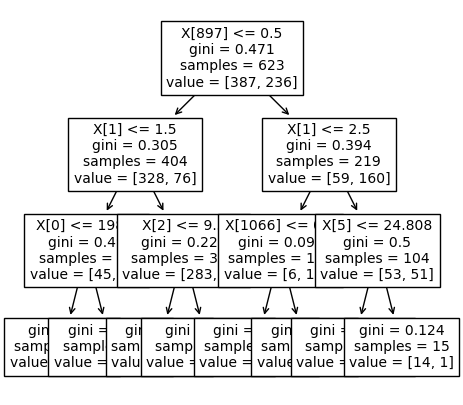

In [17]:
plt.figure(figsize=(5,5))  
# set plot size (denoted in inches)
tree.plot_tree(clftree, fontsize=10)
plt.show()

In [18]:
X_train.columns[898]

'Sex_male'

In [19]:
# Finding the accuracy of decision tree

from sklearn.metrics import accuracy_score, log_loss

print('****Results****')
train_predictions = clftree.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

****Results****
Accuracy: 74.2537%


### Using a Random Forest Classifier

In [20]:
rfc = RandomForestClassifier(criterion='gini', 
                             n_estimators=1750,
                             max_depth=7,
                             min_samples_split=6,
                             min_samples_leaf=6,
                             max_features='auto',
                             oob_score=True,
                             random_state=42,
                             n_jobs=-1,
                             verbose=1)
rfc.fit(X_train, y_train)
print('****Results****')
print("Accuracy: {:.4%}".format(rfc.score(X_test, y_test)))

/Users/brandon/miniconda3/envs/se_envir/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.5s finished


****Results****


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s


Accuracy: 60.4478%


[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.5s finished
